# Build and train a Neural Network that can automatically recognize handwritten digits, specifically to identify whether a given digit is "0" or not (binary classification).

## Import Libraries

- NumPy → fast numerical computations.

- Matplotlib → for plotting graphs/images.

- Scikit-learn → for splitting datasets into training and validation.

- TensorFlow → to build, train, and evaluate the Neural Network.

In [48]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

## Load MNIST Dataset

TensorFlow provides MNIST by default —
It has 28×28 pixel images of handwritten digits (0–9).

We split the data into:

X_train_full and y_train_full: Training data

X_test and y_test: Testing data

In [49]:
# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

In [50]:
# Load data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

## Visualize a sample

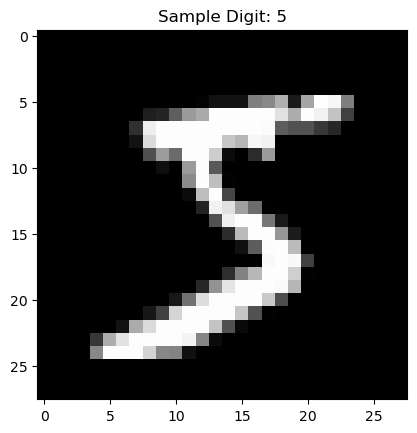

In [51]:
# Show a sample image
plt.imshow(X_train_full[0], cmap='gray')
plt.title(f"Sample Digit: {y_train_full[0]}")
plt.show()

## Binary Classification Preparation

- y_train_full contains digits 0, 1, ..., 9.

- We want binary classification:

    Label is 1 → if the image is "0".

    Label is 0 → if the image is NOT 0 (any other digit 1–9).


.astype(np.float32) → It converts True/False into 1.0/0.0 (float values TensorFlow can work with).

In [52]:
# Binary classification: "0" vs "not 0"
y_train_binary = (y_train_full == 0).astype(np.float32)  # 1 if digit is 0, else 0
y_test_binary = (y_test == 0).astype(np.float32)

## Preprocessing Images

Scale pixel values from 0-255 → 0-1 for faster and stable training.

In [53]:
# Normalize pixel values to [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

## Flatten images:

28×28 → 784-dimensional vector (1D array).

Neural networks expect 1D input for Dense layers.

In [54]:
# Flatten 28x28 images into 784-dimensional vectors
X_train_full_flat = X_train_full.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

## Split training data into:

Train Set (90%)

Validation Set (10%)

Validation helps to check if the model is generalizing well.

In [55]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full_flat, y_train_binary, test_size=0.1, random_state=42)

## Build the Model

Create a Sequential model:

- First Layer: 64 neurons, ReLU activation.

- Second Layer: 32 neurons, ReLU activation.

- Output Layer: 1 neuron, Sigmoid activation (for binary classification).

In [56]:
# Build the Neural Network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),  # First hidden layer
    layers.Dense(32, activation='relu'),                      # Second hidden layer
    layers.Dense(1, activation='sigmoid')                     # Output layer (1 neuron for binary classification)
    ])

## Compile the Model

- metrics tell TensorFlow what to monitor during training. Here, metrics=['accuracy'] means we want to calculate and show the accuracy after every epoch.

Accuracy = (Correct Predictions) / (Total Predictions)

- Loss and metrics are separate:

- Loss is minimized internally (to update weights).

- Metrics are reported externally (for humans to read).

In [58]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',      # Cost function for binary classification
    metrics=['accuracy']
)

## View Model Summary

Layer Name -	Name of each layer

Output Shape -	Size of output of each layer

Param - 	Number of parameters to train in that layer

Param Calculation:

- For Dense: (input_neurons × output_neurons) + (output_neurons for biases)

In [59]:
# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,353 (204.50 KB)

 Trainable params: 52,353 (204.50 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

X_train, y_train -	Training data

epochs -	Number of full passes through the dataset

batch_size -	Number of samples processed before updating model weights

validation_data -	Data to evaluate performance after each epoch

It returns a history object →
It contains Loss and Accuracy over epochs → used for plotting graphs later!

In [60]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9820 - loss: 0.0581 - val_accuracy: 0.9955 - val_loss: 0.0135
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9964 - loss: 0.0127 - val_accuracy: 0.9957 - val_loss: 0.0144
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9975 - loss: 0.0068 - val_accuracy: 0.9963 - val_loss: 0.0100
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9977 - val_loss: 0.0070
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9988 - loss: 0.0033 - val_accuracy: 0.9975 - val_loss: 0.0087
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9988 - loss: 0.0029 - val_accuracy: 0.9975 - val_loss: 0.0083
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9970 - val_loss: 0.0132
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9993 - loss: 0.0021 - 

## Model Evaluation

- We call model.evaluate() on unseen test data.

- It calculates the final Loss and Accuracy on test set.

- Accuracy shows how well the model generalizes.

In [61]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test_binary)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.9965 - loss: 0.0168
Test Accuracy: 0.9975


## Plot Loss and Accuracy

Training:

- Loss :	How wrong predictions are on training set

- Accuracy :	Correct % predictions on training set

Validation:

- Loss :	How wrong predictions are on validation set

- Accuracy :	Correct % predictions on validation set

We plot both because:

- If Training accuracy is high but Validation accuracy is low, the model is overfitting (memorizing data).

- If both Training and Validation losses decrease together, the model is learning well.

In [62]:
# Plot Loss and Accuracy curves
plt.figure(figsize=(14,5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

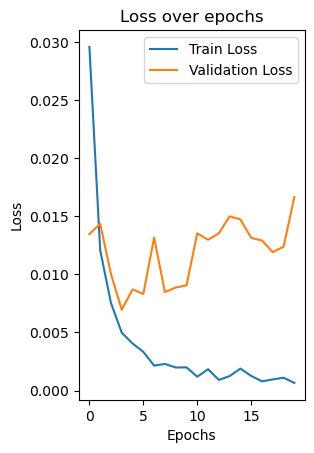

In [63]:
# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

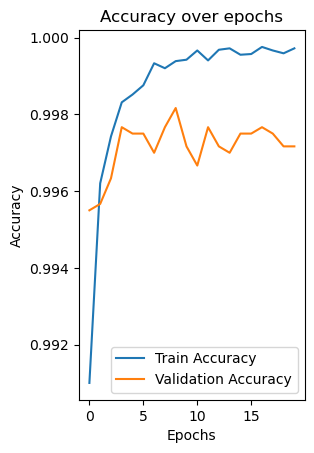

In [64]:
# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [65]:
# Predict on some test images
predictions = (model.predict(X_test_flat) > 0.5).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


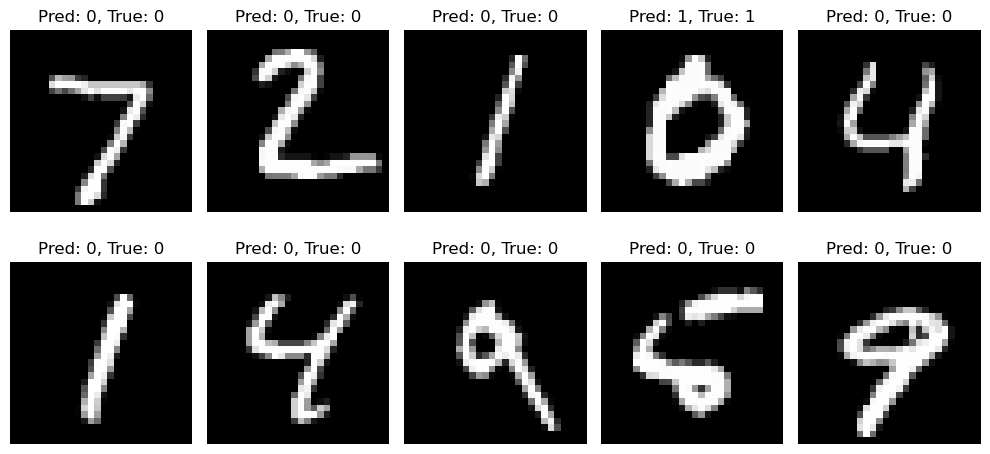

In [66]:
# Show a few test samples and their predictions
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predictions[i][0]}, True: {int(y_test_binary[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()